In [3]:
#Menginstal library pandas di Python untuk pengolahan data.
!pip install pandas

In [4]:
#Mengimpor berbagai library untuk analisis data, visualisasi, pemrosesan, dan model machine learning.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
#Menghubungkan Google Drive ke Google Colab untuk mengakses file dari Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Membaca file CSV dari Google Drive dan menyimpannya dalam variabel `df` sebagai DataFrame.
df=pd.read_csv('/content/drive/MyDrive/kaggle/mental_health_diagnosis_treatment_.csv')
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


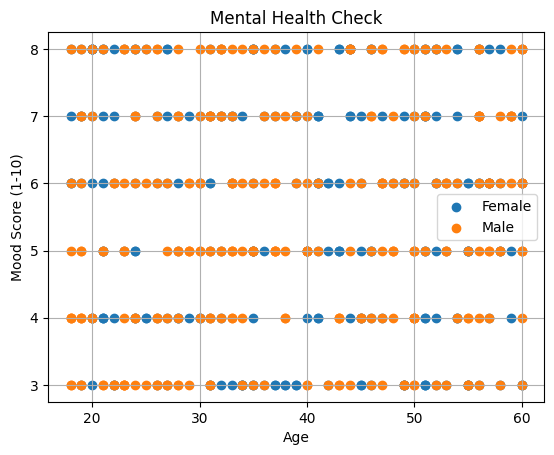

In [11]:
#Mengimpor library matplotlib.pyplot untuk membuat visualisasi grafik.
import matplotlib.pyplot as plt

#Membuat objek figure dan axes untuk plotting. fig adalah gambar, dan ax adalah area untuk menggambar grafik.
fig, ax = plt.subplots()

#Mengelompokkan data berdasarkan 'Age'.
for Gender, d in df.groupby('Gender'):

#Membuat scatter plot dengan 'Gender' di sumbu X dan 'Diagnosis' di sumbu Y, memberi label berdasarkan 'Age'.
  ax.scatter(d['Age'], d['Mood Score (1-10)'], label=Gender)

#Menampilkan legenda untuk membedakan grup.
plt.legend()

#Menambahkan judul grafik.
plt.title('Mental Health Check')

#Menambahkan label sumbu X.
plt.xlabel('Age')

#Menambahkan label sumbu Y.
plt.ylabel('Mood Score (1-10)')

#Menampilkan grid di grafik.
plt.grid(True)

#Menampilkan grafik.
plt.show()


In [12]:
#Mengimpor library NumPy untuk operasi array.
import numpy as np

#Mengonversi kolom 'Age' dan 'Mood Score (1-10)' dari DataFrame menjadi array NumPy untuk fitur input.
x_train = np.array(df[['Age', 'Mood Score (1-10)']])

#Mengonversi kolom 'Gender' dari DataFrame menjadi array NumPy untuk target output.
y_train = np.array(df['Gender'])

#Mencetak nilai array x_train (fitur input).
print(f'x_train:\n{x_train}\n')

#Mencetak nilai array y_train (target output).
print(f'y_train: {y_train}')

x_train:
[[43  5]
 [40  5]
 [55  3]
 [34  3]
 [52  6]
 [28  7]
 [59  6]
 [32  3]
 [21  7]
 [21  5]
 [42  6]
 [54  8]
 [46  4]
 [19  7]
 [23  8]
 [38  3]
 [30  8]
 [28  4]
 [52  3]
 [37  5]
 [19  4]
 [41  7]
 [50  4]
 [53  5]
 [60  6]
 [19  7]
 [23  5]
 [56  5]
 [58  6]
 [41  6]
 [44  3]
 [47  6]
 [39  6]
 [27  7]
 [53  5]
 [53  6]
 [45  5]
 [33  6]
 [31  8]
 [41  7]
 [46  8]
 [56  7]
 [31  5]
 [50  8]
 [40  8]
 [43  6]
 [48  5]
 [26  3]
 [41  6]
 [46  5]
 [40  5]
 [31  6]
 [38  8]
 [18  4]
 [28  7]
 [29  4]
 [43  4]
 [31  5]
 [35  3]
 [47  4]
 [56  8]
 [41  4]
 [30  6]
 [37  5]
 [23  5]
 [30  4]
 [28  6]
 [35  3]
 [39  7]
 [52  4]
 [51  7]
 [57  4]
 [60  6]
 [57  5]
 [24  8]
 [45  3]
 [21  5]
 [32  8]
 [29  5]
 [29  3]
 [21  3]
 [23  6]
 [33  6]
 [31  8]
 [57  6]
 [19  3]
 [22  6]
 [50  3]
 [56  7]
 [22  7]
 [55  6]
 [43  8]
 [49  6]
 [22  3]
 [49  8]
 [40  8]
 [51  5]
 [46  8]
 [43  5]
 [24  7]
 [56  7]
 [23  5]
 [31  4]
 [36  6]
 [44  7]
 [19  8]
 [40  3]
 [30  7]
 [23  3]
 [30  4]
 

In [13]:
#Mengimpor LabelBinarizer untuk mengonversi label kategori menjadi format biner.
from sklearn.preprocessing import LabelBinarizer

#Membuat objek LabelBinarizer untuk digunakan dalam transformasi label.
lb = LabelBinarizer()

#Menerapkan binarisasi pada y_train, mengubah setiap kategori menjadi representasi biner (0 atau 1).
y_train = lb.fit_transform(y_train)

#Mencetak hasil binarisasi dari y_train.
print(f'y_train:\n,{y_train}')

y_train:
,[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]


In [14]:
#Mengubah array y_train menjadi satu dimensi (flatten), jika sebelumnya dalam bentuk multidimensi.
y_train = y_train.flatten()

#Mencetak array y_train setelah di-flatten menjadi satu dimensi.
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 1 0

In [15]:
#Mengimpor kelas KNeighborsClassifier dari scikit-learn untuk algoritma K-Nearest Neighbors (KNN).
from sklearn.neighbors import KNeighborsClassifier

#Menentukan jumlah tetangga terdekat (K) yang digunakan dalam model KNN.
K = 3

#Membuat objek model KNN dengan parameter jumlah tetangga K = 3.
model = KNeighborsClassifier(n_neighbors=K)

#Melatih model KNN menggunakan data latih x_train dan label y_train.
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Mengimpor library NumPy untuk operasi array dan perhitungan numerik.
import numpy as np

#Menetapkan nilai variabel Age menjadi 43.
Age = 43

#Menetapkan nilai variabel Mood_Score_1_10 menjadi 5.
Mood_Score_1_10 = 5

#Membuat array NumPy dari nilai Age dan Mood_Score_1_10, kemudian merubahnya menjadi bentuk array dua dimensi dengan satu baris dan dua kolom.
x_new = np.array([[Age, Mood_Score_1_10]]).reshape(1, -1)

#Menampilkan array baru yang berisi nilai Age dan Mood_Score_1_10.
x_new

array([[43,  5]])

In [21]:
#Menggunakan model yang sudah dilatih untuk memprediksi label berdasarkan input baru x_new.
y_new = model.predict(x_new)

#Menampilkan hasil prediksi untuk input baru x_new menggunakan model KNN
y_new

array([0])

In [23]:
#Mengubah hasil prediksi yang telah dibinarisasi kembali ke format label aslinya sebelum binarisasi.
lb.inverse_transform(y_new)

array(['Female'], dtype='<U6')

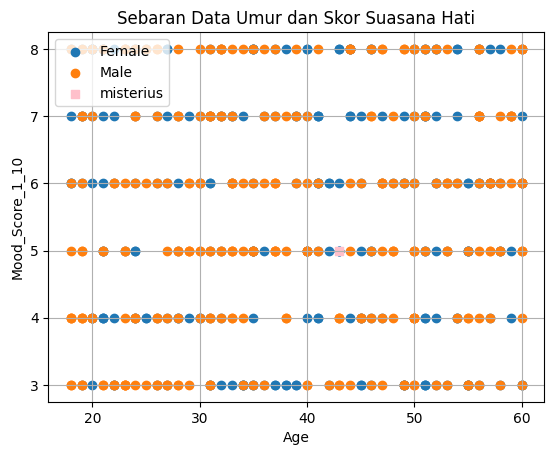

In [28]:
#Mengimpor library matplotlib.pyplot untuk membuat visualisasi grafik.
import matplotlib.pyplot as plt

#Membuat objek figure dan axes untuk plotting.
fig, ax = plt.subplots()

#Mengelompokkan data berdasarkan kolom 'Gender' untuk membedakan grup berdasarkan jenis kelamin.
for Kelamin, d in df.groupby('Gender'):

#Membuat scatter plot untuk setiap grup, dengan 'Age' di sumbu X dan 'Mood Score (1-10)' di sumbu Y, serta memberi label berdasarkan kolom 'Gender'.
    ax.scatter(d['Age'], d['Mood Score (1-10)'], label=Kelamin)

#Menambahkan titik berwarna pink berbentuk persegi pada posisi Age dan Mood_Score_1_10, memberi label 'misterius'.
plt.scatter(
    Age,
    Mood_Score_1_10,
    marker='s',
    color='pink',
    label='misterius'
)

#Menampilkan legenda di bagian kiri atas grafik.
plt.legend(loc='upper left')

#Menambahkan judul grafik.
plt.title('Sebaran Data Umur dan Skor Suasana Hati')

#Menambahkan label sumbu X, yaitu "Age".
plt.xlabel('Age')

#Menambahkan label sumbu Y, yaitu "Mood_Score_1_10".
plt.ylabel('Mood_Score_1_10')

#Menampilkan grid pada grafik.
plt.grid(True)

#Menampilkan grafik yang telah dibuat.
plt.show()

In [31]:
#Membuat array NumPy yang berisi nilai Age dan Mood_Score_1_10 untuk digunakan dalam perhitungan atau analisis lebih lanjut.
misterius = np.array([Age, Mood_Score_1_10])

#Menampilkan array yang berisi nilai Age dan Mood_Score_1_10.
misterius

array([43,  5])

In [32]:
#Menampilkan array x_train yang berisi fitur input yang digunakan untuk melatih model, data seperti yang diatas.
x_train


array([[43,  5],
       [40,  5],
       [55,  3],
       [34,  3],
       [52,  6],
       [28,  7],
       [59,  6],
       [32,  3],
       [21,  7],
       [21,  5],
       [42,  6],
       [54,  8],
       [46,  4],
       [19,  7],
       [23,  8],
       [38,  3],
       [30,  8],
       [28,  4],
       [52,  3],
       [37,  5],
       [19,  4],
       [41,  7],
       [50,  4],
       [53,  5],
       [60,  6],
       [19,  7],
       [23,  5],
       [56,  5],
       [58,  6],
       [41,  6],
       [44,  3],
       [47,  6],
       [39,  6],
       [27,  7],
       [53,  5],
       [53,  6],
       [45,  5],
       [33,  6],
       [31,  8],
       [41,  7],
       [46,  8],
       [56,  7],
       [31,  5],
       [50,  8],
       [40,  8],
       [43,  6],
       [48,  5],
       [26,  3],
       [41,  6],
       [46,  5],
       [40,  5],
       [31,  6],
       [38,  8],
       [18,  4],
       [28,  7],
       [29,  4],
       [43,  4],
       [31,  5],
       [35,  3

In [33]:
#Mengimpor fungsi euclidean dari scipy.spatial.distance untuk menghitung jarak Euclidean antara dua titik.
from scipy.spatial.distance import euclidean

#Menghitung jarak Euclidean antara titik misterius dan setiap data dalam x_train, kemudian menyimpan hasilnya dalam list data_jarak.
data_jarak = [euclidean(misterius, d) for d in x_train]

#Menampilkan list yang berisi jarak Euclidean antara misterius dan setiap data di x_train.
data_jarak

[0.0,
 3.0,
 12.165525060596439,
 9.219544457292887,
 9.055385138137417,
 15.132745950421556,
 16.0312195418814,
 11.180339887498949,
 22.090722034374522,
 22.0,
 1.4142135623730951,
 11.40175425099138,
 3.1622776601683795,
 24.08318915758459,
 20.223748416156685,
 5.385164807134504,
 13.341664064126334,
 15.033296378372908,
 9.219544457292887,
 6.0,
 24.020824298928627,
 2.8284271247461903,
 7.0710678118654755,
 10.0,
 17.029386365926403,
 24.08318915758459,
 20.0,
 13.0,
 15.033296378372908,
 2.23606797749979,
 2.23606797749979,
 4.123105625617661,
 4.123105625617661,
 16.1245154965971,
 10.0,
 10.04987562112089,
 2.0,
 10.04987562112089,
 12.36931687685298,
 2.8284271247461903,
 4.242640687119285,
 13.152946437965905,
 12.0,
 7.615773105863909,
 4.242640687119285,
 1.0,
 5.0,
 17.11724276862369,
 2.23606797749979,
 3.0,
 3.0,
 12.041594578792296,
 5.830951894845301,
 25.019992006393608,
 15.132745950421556,
 14.035668847618199,
 1.0,
 12.0,
 8.246211251235321,
 4.123105625617661,
 1

In [34]:
#Menambahkan kolom baru 'jarak' ke DataFrame df yang berisi nilai-nilai jarak Euclidean yang telah dihitung sebelumnya.
df.loc[:, 'jarak'] = data_jarak

#Mengurutkan DataFrame df berdasarkan kolom 'jarak' secara default dari nilai terkecil ke terbesar.
df.sort_values(['jarak'])

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%),jarak
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66,0.000000
206,207,43,Female,Bipolar Disorder,5,5,6,9,Anxiolytics,Mindfulness-Based Therapy,2024-03-23,12,10,Improved,6,Neutral,65,0.000000
98,99,43,Female,Panic Disorder,6,5,8,4,Antipsychotics,Dialectical Behavioral Therapy,2024-02-12,11,5,Deteriorated,9,Neutral,78,0.000000
320,321,44,Male,Bipolar Disorder,10,5,8,7,Anxiolytics,Mindfulness-Based Therapy,2024-03-25,16,9,Deteriorated,7,Neutral,87,1.000000
339,340,42,Female,Generalized Anxiety,7,5,4,8,Antidepressants,Mindfulness-Based Therapy,2024-01-10,8,9,No Change,5,Neutral,88,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,18,Male,Major Depressive Disorder,5,3,6,5,Mood Stabilizers,Dialectical Behavioral Therapy,2024-03-01,12,10,Improved,9,Excited,63,25.079872
182,183,18,Female,Bipolar Disorder,10,7,8,10,Benzodiazepines,Dialectical Behavioral Therapy,2024-03-10,16,8,No Change,7,Depressed,89,25.079872
456,457,18,Male,Panic Disorder,9,3,7,5,Antipsychotics,Cognitive Behavioral Therapy,2024-01-14,13,5,Deteriorated,8,Anxious,63,25.079872
402,403,18,Female,Bipolar Disorder,5,8,4,10,Antipsychotics,Mindfulness-Based Therapy,2024-04-01,13,5,No Change,5,Neutral,68,25.179357


In [38]:
#Membuat array NumPy x_test yang berisi data uji untuk fitur input (misalnya 'Age' dan 'Mood Score').
x_test = np.array([[43, 5], [44, 5], [42, 5], [18, 3]])

#Mengubah label kategori ('1', '0') menjadi format biner menggunakan LabelBinarizer dan meratakannya menjadi array satu dimensi.
y_test = lb.transform(np.array(['1', '0', '1', '0'])).flatten()

#Mencetak array x_test yang berisi data uji.
print(f'x_test:\n{x_test}\n')

#Mencetak array y_test yang berisi label target uji setelah transformasi.
print(f'y_test: {y_test}')

x_test:
[[43  5]
 [44  5]
 [42  5]
 [18  3]]

y_test: [0 0 0 0]


In [39]:
#Menggunakan model yang telah dilatih untuk memprediksi label berdasarkan data uji x_test.
y_pred = model.predict(x_test)

#Menampilkan hasil prediksi yang diberikan oleh model untuk data uji x_test.
y_pred

array([0, 0, 0, 1])

In [40]:
#Mengimpor fungsi accuracy_score dari scikit-learn untuk menghitung akurasi model.
from sklearn.metrics import accuracy_score

#Menghitung akurasi model dengan membandingkan label prediksi y_pred dan label sebenarnya y_test.
acc = accuracy_score(y_test, y_pred)

#Mencetak nilai akurasi model yang dihitung.
print(f'Accurancy: {acc}')

Accurancy: 0.75


In [42]:
#Mengimpor fungsi precision_score dari scikit-learn untuk menghitung skor presisi model.
from sklearn.metrics import precision_score

#Menghitung presisi model dengan membandingkan label prediksi y_pred dan label sebenarnya y_test.
prec = precision_score(y_test, y_pred)

#Mencetak nilai presisi model yang dihitung.
print(f'Precision: {prec}')

Precision: 0.0


In [43]:
#Mengimpor fungsi recall_score dari scikit-learn untuk menghitung skor recall model.
from sklearn.metrics import recall_score

#Menghitung recall model dengan membandingkan label prediksi y_pred dan label sebenarnya y_test.
rec = recall_score(y_test, y_pred)

#Mencetak nilai recall model yang dihitung.
print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
#Mengimpor fungsi f1_score dari scikit-learn untuk menghitung F1-score model.
from sklearn.metrics import f1_score

#Menghitung F1-score model dengan membandingkan label prediksi y_pred dan label sebenarnya y_test.
f1 = f1_score(y_test, y_pred)

#Mencetak nilai F1-score model yang dihitung.
print(f'F1-Score: {f1}')

F1-Score: 0.0


In [45]:
#Mengimpor fungsi classification_report dari scikit-learn untuk menghasilkan laporan klasifikasi model.
from sklearn.metrics import classification_report

#Menghasilkan laporan klasifikasi yang mencakup metrik seperti precision, recall, F1-score, dan support untuk setiap kelas, berdasarkan prediksi y_pred dan label sebenarnya y_test.
cls_report = classification_report(y_test, y_pred)

#Mencetak laporan klasifikasi yang berisi hasil evaluasi model secara rinci.
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
#Mengimpor fungsi matthews_corrcoef dari scikit-learn untuk menghitung skor koefisien korelasi Matthews (MCC), yang merupakan ukuran evaluasi model klasifikasi.
from sklearn.metrics import matthews_corrcoef

#Menghitung skor MCC antara label prediksi y_pred dan label sebenarnya y_test.
mcc = matthews_corrcoef(y_test, y_pred)

#Mencetak nilai MCC yang dihitung untuk mengevaluasi performa model klasifikasi.
print(f'MCC: {mcc}')

MCC: 0.0
